# MGPO 695 - Sentiment Analysis on Presidential Public Relations through Twitter

The aim of this project is to perform sentiment analysis on tweets published by each of the three current and last presidents of the United States of America in order to draw insights on words that are most associated with people reacting to them, in a good or bad way. The business idea behind that is to propose a sentiment analysis for a company in charge of taking care of the electoral campaigns for any politician wishing to form an image within a people.

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## III. Obama

In [2]:
df = pd.read_csv("obama.csv")

In [3]:
df.head()

,Date,Username,Tweet-text,Tweet Link,Retweets,Likes,TweetImageUrl,Image
0,2019/04/10_17:08,https://twitter.com/BarackObama,From a big NBA fan congrats to future Hall of ...,https://twitter.com/BarackObama/status/1116130...,20954,175133,NaN,NaN
1,2019/04/06_06:16,https://twitter.com/BarackObama,In just a few minutes I’m taking the stage at ...,https://twitter.com/BarackObama/status/1114517...,5206,36179,NaN,NaN
2,2019/04/05_09:25,https://twitter.com/BarackObama,A voice everybody should hear.https://twitter....,https://twitter.com/BarackObama/status/1114202...,27938,134604,NaN,NaN
3,2019/04/04_12:23,https://twitter.com/BarackObama,Here’s a story about people doing good that's ...,https://twitter.com/BarackObama/status/1113884...,15396,78627,NaN,NaN
4,2019/04/03_12:07,https://twitter.com/BarackObama,Great to see Chicago’s historic mayoral race b...,https://twitter.com/BarackObama/status/1113518...,8991,98094,NaN,NaN


#### Data Cleaning

Define the set of stop words to be removed

In [4]:
stop_words = set(stopwords.words("english"))
stop_words.update(["u", "amp", "rt", "the", "to", "is", "of", "and", "a", "in", "for", "are", "@BarackObama", "barackobama", "obama", "barack", "on", "I"])

Remove tweets that contain URLs

In [5]:
df = df[~df['Tweet-text'].str.contains("http")]

Remove punctuation and convert to lowercase

In [6]:
df['Tweet-text'] = df['Tweet-text'].str.lower().apply(lambda x: re.sub(r'[^\w\s]','', x))

Remove stop words

In [7]:
df['Tweet-text'] = df['Tweet-text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

Remove any rows with empty clean_text values

In [8]:
df = df.dropna(subset=['Tweet-text'])

### Sentiment Analysis

Calculate the sentiment analysis score for each tweet

In [9]:
df["sentiment_score"] = df["Tweet-text"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

Divide tweets into clusters based on sentiment analysis score

In [10]:
sentiment_max = df["sentiment_score"].max()
sentiment_min = df["sentiment_score"].min()
sentiment_range = sentiment_max - sentiment_min
cluster_size = 0.25 * sentiment_range
df["cluster"] = df["sentiment_score"].apply(lambda score: int((score - sentiment_min) / cluster_size))

Generate a word cloud for each cluster

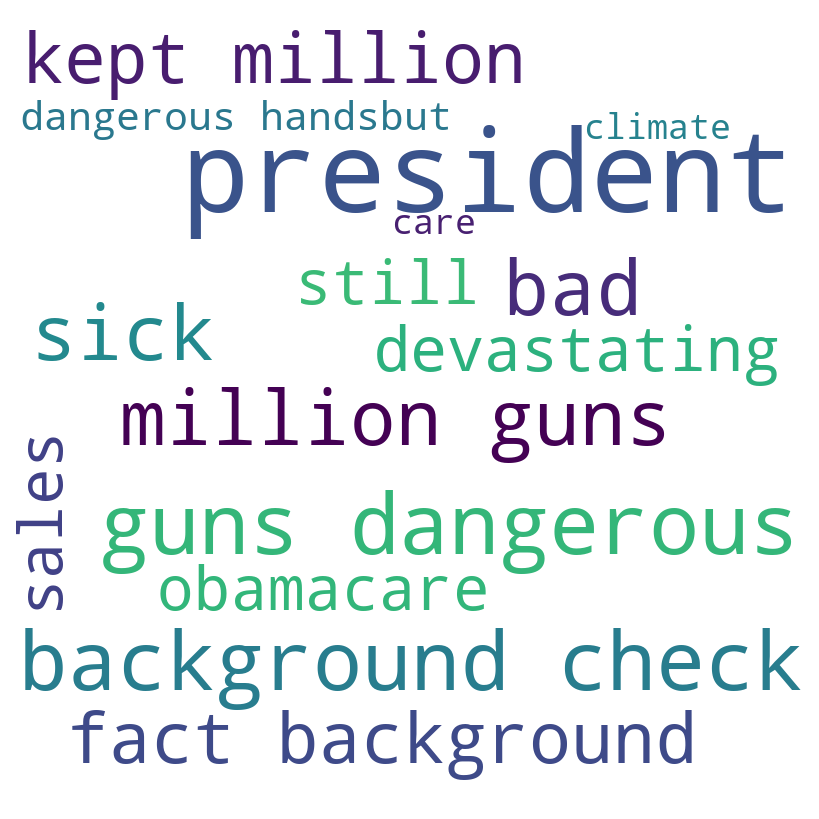

Top 30 Words in Cluster 1: 
             word  frequency
0       president         15
1       dangerous          8
2            guns          7
3      background          7
4            sick          6
5             bad          6
6         million          6
7            fact          6
8               2          5
9            kept          5
10       handsbut          4
11         checks          4
12          sales          4
13          would          4
14      obamacare          4
15            gun          4
16          still          4
17    devastating          4
18        country          3
19             go          3
20      repealing          3
21        cutting          3
22          agree          3
23           care          3
24   actonclimate          3
25  wedemandavote          3
26        climate          3
27          check          3
28            act          2
29        effects          2


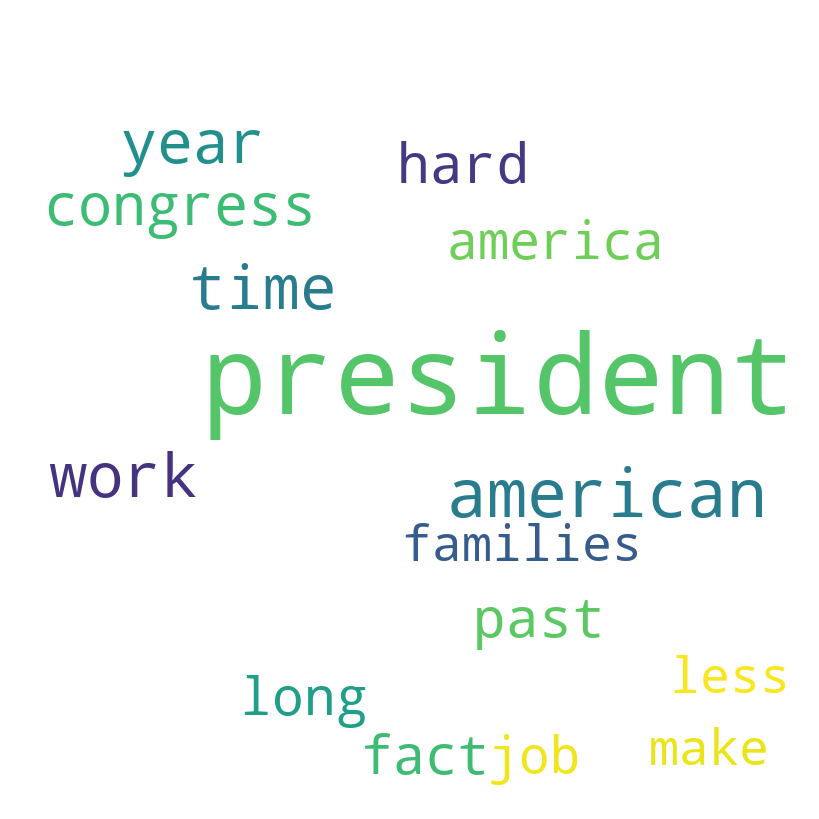

Top 30 Words in Cluster 2: 
           word  frequency
0     president        172
1          work         32
2          hard         30
3          long         30
4      congress         27
5          time         23
6          past         21
7         years         21
8        system         21
9   immigration         21
10    americans         20
11         fact         20
12         jobs         20
13          get         19
14       broken         18
15       health         17
16         less         16
17      million         16
18     families         16
19      america         14
20       people         14
21         sotu         14
22        small         14
23         care         13
24     american         13
25   businesses         13
26           us         13
27          one         13
28         make         13
29     together         12


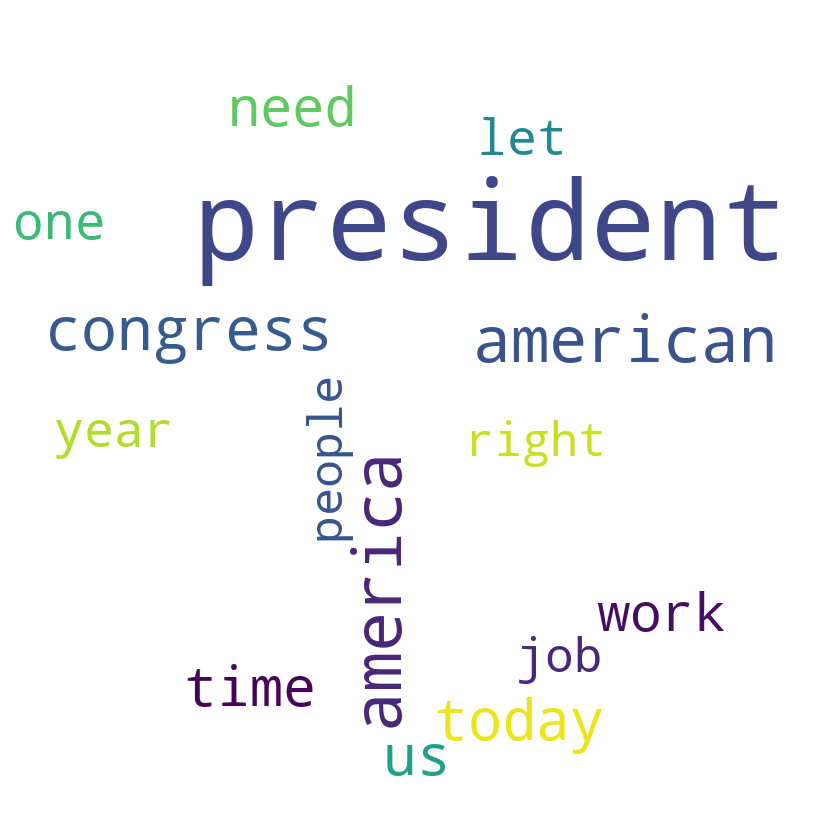

Top 30 Words in Cluster 3: 
         word  frequency
0   president       1190
1    congress        166
2        time        162
3   americans        160
4      people        152
5     america        132
6    american        124
7      health        120
8     retweet        119
9          us        115
10    economy        111
11       jobs        110
12        get        109
13       care        108
14       make        104
15        one        103
16      today        103
17       work        100
18      agree         96
19        act         91
20        gun         89
21     change         89
22      every         87
23       fact         85
24       need         84
25       sotu         83
26      right         82
27    country         79
28  obamacare         79
29    million         77


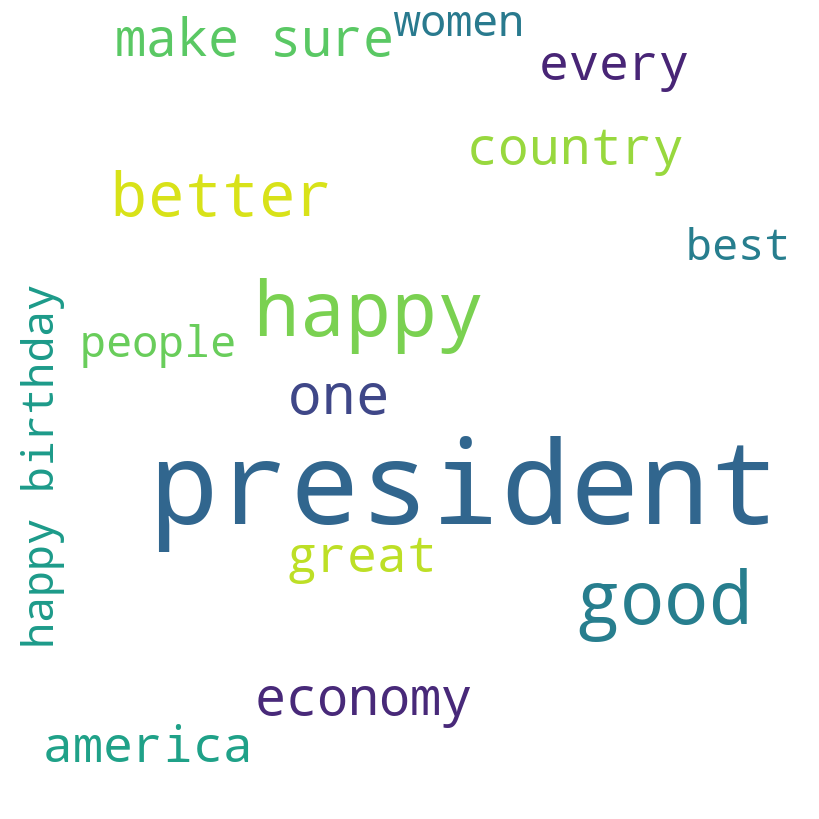

Top 30 Words in Cluster 4: 
         word  frequency
0   president        147
1       happy         58
2        good         42
3        make         31
4      better         27
5        fair         26
6     america         22
7        sure         22
8         one         21
9     economy         20
10    country         19
11      every         18
12      great         18
13        day         17
14       love         16
15   birthday         15
16       best         14
17         us         13
18        got         13
19      proud         13
20     people         13
21       many         12
22   favorite         12
23      women         12
24  americans         12
25     senate         12
26        get         12
27       weve         11
28     family         11
29      today         11


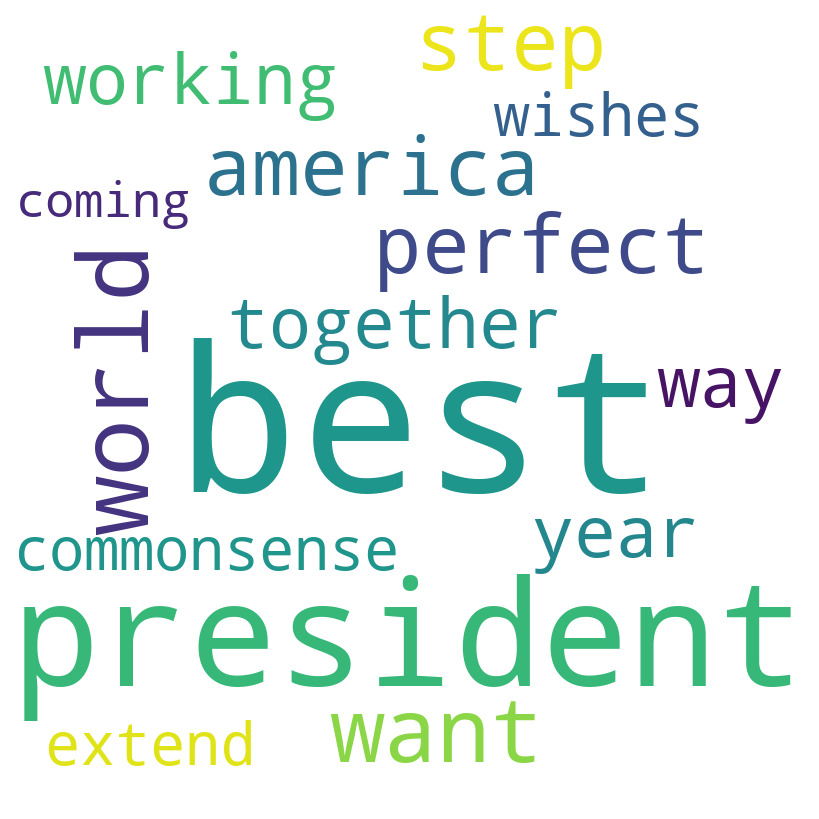

Top 30 Words in Cluster 5: 
           word  frequency
0          best         23
1     president         19
2         world          6
3          want          5
4       america          4
5       perfect          4
6   commonsense          3
7           way          3
8      together          3
9        extend          3
10      working          3
11       wishes          3
12       system          2
13       united          2
14         step          2
15       states          2
16       coming          2
17       around          2
18          get          2
19        solve          2
20     michelle          2
21    workforce          2
22         save          2
23        steps          2
24          may          2
25        still          2
26        agree          2
27         pass          2
28      retweet          2
29         ever          2


In [11]:
for i in range(df["cluster"].nunique()):
    # filter tweets for the current cluster
    cluster_df = df[df["cluster"] == i]
    # concatenate the text of all tweets in the current cluster
    text = " ".join(cluster_df["Tweet-text"])
    # generate the word cloud for the current cluster
    wordcloud = WordCloud(width=800, height=800, max_words=15, background_color="white").generate(text)
    # plot the word cloud for the current cluster
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    # generate a table of word frequencies for the current cluster
    word_freq = pd.Series(text.split()).value_counts().reset_index()
    word_freq.columns = ["word", "frequency"]
    top_30_words = word_freq.head(30)
    print("Top 30 Words in Cluster {}: ".format(i+1))
    print(top_30_words)

* **Cluster 1 (Sentiment score between -1.0 and -0.6)**: These 30 words appear to be related to discussions around **gun control and healthcare reform in the United States, with an empahsis on neagtivity and criticism**. The word "president" suggests a political context, while "dangerous", "guns", and "background" point to the issue of gun violence. The words "obamacare" and "repealing" suggest a conversation about healthcare reform, which could potentially include discussions around access to mental healthcare for individuals who may be at risk of committing gun violence. The words "devastating", "actonclimate", and "wedemandavote" hint at a broader political discourse, possibly about the effects of climate change and the importance of civic engagement.

* **Cluster 2 (Sentiment score between -0.6 and -0.2)**: This cluster seems to revolve around themes of politics, hard work, and immigration in the United States. The word "president" appears as the most frequent word, indicating a political context, while "work", "hard", and "long" suggest a discourse on the value of hard work and dedication. "Congress" and "system" suggest discussion around the functioning of government and policies, including "immigration", "jobs", "broken", and "health", which could potentially be linked to debates around healthcare access and the economy. The phrase "State of the Union" (SOTU) indicates that the discussion might be related to a presidential address or policy plan. **Hence, this cluster suggests a conversation about the role of government, immigration policy, and the importance of hard work and dedication in America.**

* **Cluster 3 (Sentiment score between -0.2 and 0.2)**: This cluster appears to be centered around political and social issues in the United States, with a strong focus on the role of the president and Congress. The word "president" is the most frequent word, indicating a political context, while "congress", "americans", "people", "america", and "american" suggest discussion about the role of government in society. The words "health", "jobs", "economy", "care", "gun", and "obamacare" suggest debates around healthcare, gun control, and the economy. The phrase "State of the Union" (SOTU) suggests that some of the discussion may be related to a presidential address. **Thus, this cluster suggests a conversation about the role of government in promoting the well-being of its citizens, as well as ongoing debates around healthcare, gun control, and the economy in the United States.**

* **Cluster 4 (Sentiment core between 0.2 and 0.6)**: This cluster appears to be centered around positive sentiments related to personal and national events. The word "president" appears to be included in a more positive context, as seen in the high frequency of the word "happy". Other words related to positive emotions, such as "good", "better", "fair", "sure", "love", and "proud", are also frequent. The cluster includes words related to personal events, such as "birthday" and "favorite", as well as more national events, such as "america" and "americans". There are also some words related to the economy and government, such as "economy", "country", and "senate", but they appear to be less frequent and are likely included in a more positive context. **Overall, this cluster suggests a conversation about positive events and feelings, and a sense of pride and love for one's country.**

* **Cluster 5 (Sentiment score between 0.6 and 1.0)**: This cluster seems to be a bit harder to interpret as it has fewer words and some of them are less common or more ambiguous. From the top words, it seems to be a more positive or supportive cluster, with words like "best," "perfect," and "wishes." It also includes some words related to working together or finding solutions, like "together," "extend," and "solve."There are some more specific or unique words in this cluster, like "commonsense," "michelle," and "workforce," which could suggest that this cluster is related to a particular topic or context that is not immediately clear from the word list alone. Overall, this cluster seems to have a more positive or optimistic tone than some of the others, but without more information it's hard to say exactly what it is referring to.

Create a scatter plot of sentiment_score vs. retweets

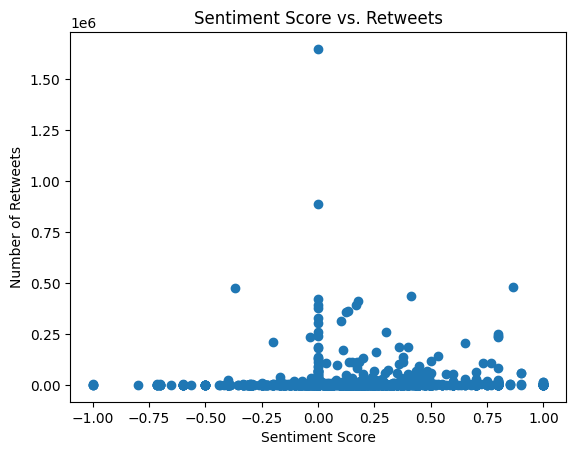

In [13]:
plt.scatter(df["sentiment_score"], df["Retweets"])
plt.title("Sentiment Score vs. Retweets")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Retweets")
plt.show()

Create a scatter plot of sentiment_score vs. favorites

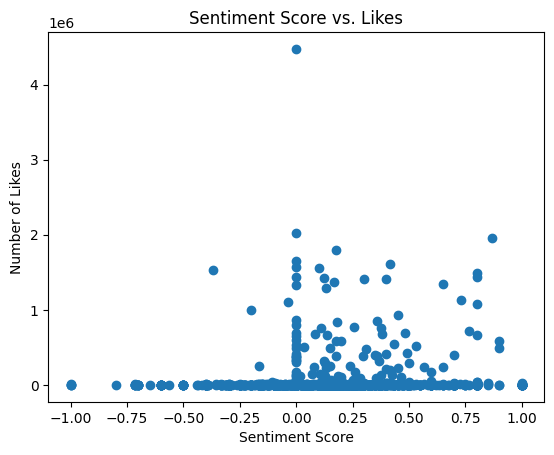

In [14]:
plt.scatter(df["sentiment_score"], df["Likes"])
plt.title("Sentiment Score vs. Likes")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Likes")
plt.show()

Create a list to store the total retweets for each cluster, loop through each cluster and calculate the total retweets to plot a histogram of sentiment score vs. total retweets for each cluster

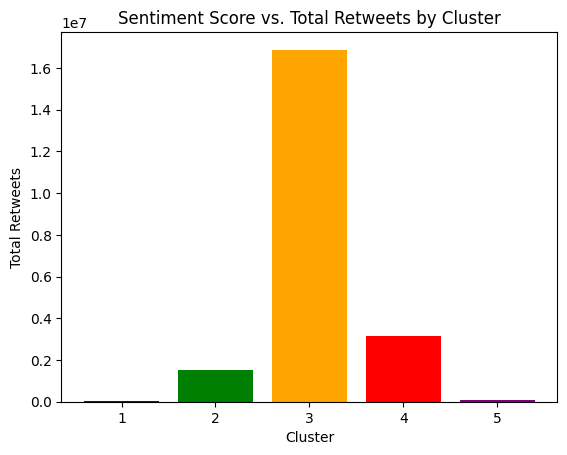

In [16]:
retweets_by_cluster = []

for i in range(df["cluster"].nunique()):
    cluster_df = df[df["cluster"] == i]
    total_retweets = cluster_df["Retweets"].sum()
    retweets_by_cluster.append(total_retweets)
    
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.bar(range(1, df["cluster"].nunique()+1), retweets_by_cluster, color=colors)
plt.title("Sentiment Score vs. Total Retweets by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Retweets")
plt.xticks(range(1, df["cluster"].nunique()+1))
plt.show()

Create a list to store the total favorites for each cluster, loop through each cluster and calculate the total favorites to plot a histogram of sentiment score vs. total favorites for each cluster

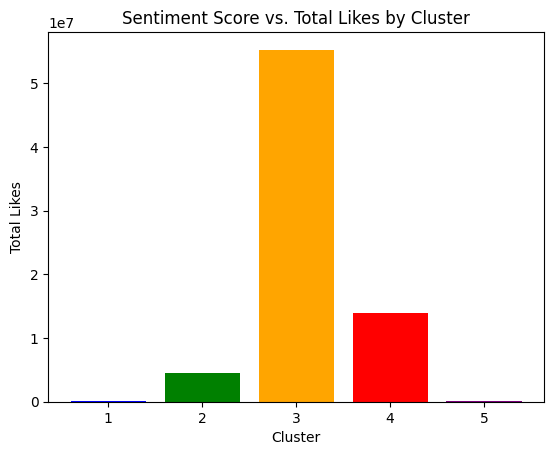

In [17]:
favorites_by_cluster = []

for i in range(df["cluster"].nunique()):
    cluster_df = df[df["cluster"] == i]
    total_favorites = cluster_df["Likes"].sum()
    favorites_by_cluster.append(total_favorites)
    
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.bar(range(1, df["cluster"].nunique()+1), favorites_by_cluster, color=colors)
plt.title("Sentiment Score vs. Total Likes by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Likes")
plt.xticks(range(1, df["cluster"].nunique()+1))
plt.show()

Print the average retweets for each cluster

In [18]:
# calculate the average retweets per cluster
avg_retweets = df.groupby('cluster')['Retweets'].mean()

# print the average retweets per cluster
print(avg_retweets)

cluster
0     1376.838710
1     5157.728814
2     7333.973490
3    10147.278317
4     2521.600000
Name: Retweets, dtype: float64


Print the average favorites for each cluster

In [19]:
# calculate the average favorites per cluster
avg_favorites = df.groupby('cluster')['Likes'].mean()

# print the average favorites per cluster
print(avg_favorites)

cluster
0     1677.645161
1    15265.894915
2    24006.209040
3    45222.572816
4     3340.760000
Name: Likes, dtype: float64


### How to interpret the above graphs and numbers:

The graphs showing the sentiment score v.s. retweets or likes generates a histogram where the distribution of sentiment scores vs. likes or retweets gives just one tall bar in the middle cluster (cluster 3).This suggests that there is a strong correlation between sentiment scores and likes or retweets for that particular cluster. This means that tweets in cluster 3, which is about the role of government in promoting the well-being of its citizens, as well as ongoing debates around healthcare, gun control, and the economy in the United States, may have resonated strongly with the public and garnered a lot of engagement.

Average retweets and likes being very high in cluster 4 (10147 average retweets, 45222 average likes) ans cluster 3 (7333 average retweets, 24006 average likes) suggest that Twitter users react very popularily with these two clusters specificially compared to other cluster.

#### Factors that drive retweetting and favoriting behavior on Twitter

1. Content quality: High-quality content that is interesting, informative, and entertaining is more likely to be retweeted.


2. Emotional engagement: Emotional content that triggers strong feelings such as happiness, awe, or anger is more likely to be retweeted.


3. Relevance: Content that is relevant to the interests of a user's followers or the general Twitter audience is more likely to be retweeted.


4. Timeliness: Fresh and current content that is related to current events or trending topics is more likely to be retweeted.


5. Source credibility: Content shared by credible sources such as verified accounts or reputable news sources is more likely to be retweeted.

# Which topics to bring up on Twitter to spark conversation, be a popular subject, and to be liked by your community

### (based on Biden's Twitter activity)

Based on the average number of retweets and likes per cluster, as well as the relationship between sentiment core and retweets and likes, it appears that tweets from cluster 3 generated the highest number of retweets, followed by cluster 4. This suggests that **discussion around the role of government in promoting the well-being of its citizens, as well as ongoing debates around healthcare, gun control, and the economy in the United States can generate a high level of emotional engagement and relevance with Twitter users, which can drive retweets and likes. Tweets about  positive events and feelings, and a sense of pride and love also did generate a lot of reactivity.**

On the other hand, tweets from cluster 1 and 2 generated the lowest number of retweets, indicating that **negative sentiments and discussion around gun control and healthcare reform in the United States, with an empahsis on neagtivity and criticism left Twitter's users quite indifferent.**

Therefore, we can conclude from Obama's tweets that  discussion around the role of government in promoting the well-being of its citizens, as well as ongoing debates around healthcare, gun control, and the economy in the United States can generate a lot of reactivity when discussion **positively**. As soon as these same topic were discussed with an emphasis on negativity, they weren't being taken with as much reactivity as they were when disucssed positively. This might be due to Obama's public image in the US, which revolves aorund well being, calmness and love. That is not necessarily a generality and this case may not apply to somebody else.